In [1]:
#import Dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.cluster import KMeans

# Load Dataset

In [2]:
#Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/BillyAnthonyB/ALP_Dataset/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv')
df.head()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


# EDA

In [3]:
#describe
df.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,87.000000,89.000000,85.000000,90.000000,88.000000,90.000000
mean,1.544444,31.044444,7.221264,6.123596,1.752941,95.700000,14.500000,0.788889
std,0.500811,12.235435,3.151325,4.231431,0.829599,136.614643,17.378147,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,10.000000,9.000000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [4]:
#info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [5]:
#Cek duplicate values
df.duplicated().value_counts()

False    90
dtype: int64

In [6]:
#Cek missing value
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

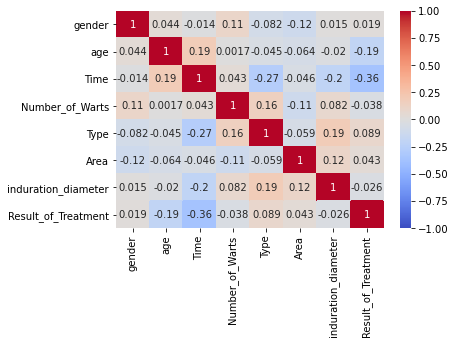

In [7]:
#cek heatmap dataset yang masih null untuk meliat korelasi antar variabel
sns.heatmap(df.corr(), cmap = "coolwarm", vmin = -1, vmax = 1, annot=True)
plt.show()

### Create Model Random Forest Regressor (Time)

In [8]:
#memasukkan data yang dibutuhkan ke dalam df baru dan menghapus null pada df baru tersebut
dftime = df[['Time', 'age', 'Type', 'Result_of_Treatment']]
dftime = dftime.dropna()
dftime.head()

,Time,age,Type,Result_of_Treatment
0,11.00,15,1.0,0
1,11.75,27,1.0,0
2,12.00,32,1.0,0
3,1.75,33,2.0,0
4,5.00,34,3.0,0


In [9]:
#cek apakah null sudah hilang
dftime.isnull().sum()

Time                   0
age                    0
Type                   0
Result_of_Treatment    0
dtype: int64

In [10]:
X = dftime[['age','Type','Result_of_Treatment']]
y = dftime['Time']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressorForest = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressorForest.fit(X, y)

RandomForestRegressor(random_state=0)

In [13]:
y_pred = regressorForest.predict(X_test)
y_pred

array([ 5.4525    ,  9.90086905,  8.33594444,  8.02875   ,  4.2982381 ,
        6.4445    , 10.32      ,  7.61766667,  6.6425    , 10.9325    ,
        6.05590476,  9.96      ,  7.3745    ,  4.9175    ,  8.95470833,
        9.571     ,  6.31708333])

In [14]:
def mape(y_test, pred):
    mape = np.mean(np.abs((y_test - pred) / y_test))*100
    return mape

print('MAPE :', mape(y_test, y_pred))
print('Model Score: ', regressorForest.score(np.array(X_test), y_test)*100)

MAPE : 12.963551448336688
Model Score:  84.13951434262343


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Create Model Random Forest Regressor (Induration Diameter)

In [15]:
#memasukkan data yang dibutuhkan ke dalam df baru dan menghapus null pada df baru tersebut
dfinduration = df[['induration_diameter','Time', 'Type', 'Area']]
dfinduration = dfinduration.dropna()
dfinduration.head()

,induration_diameter,Time,Type,Area
0,25.0,11.00,1.0,30
1,6.0,11.75,1.0,208
2,50.0,12.00,1.0,43
3,7.0,1.75,2.0,379
4,7.0,5.00,3.0,64


In [16]:
X = dfinduration[['Time', 'Type', 'Area']]
y = dfinduration['induration_diameter']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

In [18]:
from sklearn.ensemble import RandomForestRegressor
regressorForest = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressorForest.fit(X, y)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = regressorForest.predict(X_test)
y_pred

array([ 5.49, 23.34, 15.49, 10.89,  8.77, 58.9 ,  7.27, 50.32,  9.99,
       42.75,  6.44, 33.84,  8.03,  3.56,  7.44,  4.87, 42.09, 38.47,
       11.96,  6.29])

In [20]:
def mape(y_test, pred):
    mape = np.mean(np.abs((y_test - pred) / y_test))*100
    return mape

print('MAPE :',mape(y_test, y_pred))
print('Model Score: ', regressorForest.score(np.array(X_test), y_test)*100)

MAPE : 37.985019841269846
Model Score:  94.31591498245716


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Create Model Support Vector Machine Classification (Type)

In [21]:
#memasukkan data yang dibutuhkan ke dalam df baru dan menghapus null pada df baru tersebut
dftype = df[['Type','Time', 'Number_of_Warts','induration_diameter']]
dftype = dftype.dropna()
dftype.head()

,Type,Time,Number_of_Warts,induration_diameter
0,1.0,11.00,6.0,25.0
2,1.0,12.00,9.0,50.0
3,2.0,1.75,7.0,7.0
4,3.0,5.00,7.0,7.0
5,1.0,12.00,14.0,6.0


In [22]:
#cek apakah null sudah hilang
dftype.isnull().sum()

Type                   0
Time                   0
Number_of_Warts        0
induration_diameter    0
dtype: int64

In [23]:
X = dftype[['Time','Number_of_Warts','induration_diameter']]
y = dftype['Type']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [25]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [26]:
y_pred = clf.predict(X_test)
y_pred

array([1., 3., 1., 1., 1., 3., 1., 1.])

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
 [[5 0 0]
 [1 0 0]
 [0 0 2]]
Accuracy Score:  87.5


### Mode Number_of_Warts

In [28]:
#memasukkan data yang dibutuhkan ke dalam df baru
dfNoW = df[['gender', 'Area', 'Number_of_Warts']]
dfNoW.head()

,gender,Area,Number_of_Warts
0,1,30,6.0
1,1,208,NaN
2,1,43,9.0
3,1,379,7.0
4,1,64,7.0


In [29]:
#mengisi number_of_warts dengan modus
dfNoW['Number_of_Warts'].fillna(dfNoW['Number_of_Warts'].mode()[0], inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [30]:
#cek apakah null values sudah hilang
dfNoW.isnull().sum()

gender             0
Area               0
Number_of_Warts    0
dtype: int64

# Fill Null Values

In [31]:
#cek null values pada df(data pertama) 
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

In [32]:
#cek null values pada time
df[df['Time'].isnull()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,NaN,8.0,2.0,56,45.0,1
50,1,54,NaN,13.0,3.0,43,5.0,1
72,2,28,NaN,4.0,1.0,9,2.0,1


In [33]:
#mengisi df[time] dengan model yang telah dibuat diatas
df_filltime = df['Time'].isnull()
var_filltime = pd.DataFrame(df[['age','Type','Result_of_Treatment']][df_filltime])
predict_time = regressorForest.predict(var_filltime)
df.loc[df['Time'].isnull(), 'Time'] = predict_time

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Result_of_Treatment
- age
Feature names seen at fit time, yet now missing:
- Area
- Time

  warnings.warn(message, FutureWarning)


In [34]:
#cek apakah null dalam time telah terisi
df.iloc[[43,50,72]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,21.04,8.0,2.0,56,45.0,1
50,1,54,18.24,13.0,3.0,43,5.0,1
72,2,28,36.76,4.0,1.0,9,2.0,1


In [35]:
#cek null values pada Number of warts
df[df['Number_of_Warts'].isnull()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
1,1,27,11.75,NaN,1.0,208,6.0,0


In [36]:
#mengisi number_of_warts dengan modus
df['Number_of_Warts'].fillna(df['Number_of_Warts'].mode()[0], inplace=True)

In [37]:
#cek apakah null dalam number of warts telah terisi
df.iloc[[1]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
1,1,27,11.75,2.0,1.0,208,6.0,0


In [38]:
#cek null values pada Type
df[df['Type'].isnull()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.0,NaN,50,9.0,0
26,1,20,8.00,6.0,NaN,45,8.0,1
66,2,23,6.75,6.0,NaN,19,2.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
89,2,53,7.25,6.0,NaN,81,7.0,1


In [39]:
#mengisi df[type] dengan model yang telah dibuat diatas
df_filltype = df['Type'].isnull()
var_filltype = pd.DataFrame(df[['Time','Number_of_Warts','induration_diameter']][df_filltype])
predict_type = clf.predict(var_filltype)
df.loc[df['Type'].isnull(), 'Type'] = predict_type

In [40]:
#cek apakah null dalam type telah terisi
df.iloc[[10,26,66, 86, 89]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.0,1.0,50,9.0,0
26,1,20,8.00,6.0,1.0,45,8.0,1
66,2,23,6.75,6.0,1.0,19,2.0,1
86,2,51,6.00,6.0,1.0,80,2.0,1
89,2,53,7.25,6.0,1.0,81,7.0,1


In [41]:
#cek null values pada induration diameter
df[df['induration_diameter'].isnull()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,1,15,4.0,4.0,3.0,25,NaN,1
53,2,15,6.5,19.0,1.0,56,NaN,1


In [42]:
#mengisi df[induration_diameter] dengan model yang telah dibuat diatas
df_fillinduration = df['induration_diameter'].isnull()
var_fillinduration = pd.DataFrame(df[['Time', 'Type', 'Area']][df_fillinduration])
predict_induration = regressorForest.predict(var_fillinduration)
df.loc[df['induration_diameter'].isnull(), 'induration_diameter'] = predict_induration

In [43]:
#cek apakah null dalam induration diameter telah terisi
df.iloc[[19,53]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,1,15,4.0,4.0,3.0,25,41.27,1
53,2,15,6.5,19.0,1.0,56,6.74,1


In [44]:
#mengecek semua null telah terisi
df.isnull().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

# Handling Imbalance Data

In [45]:
#handling imbalance data (Resampling)
df['Result_of_Treatment'].value_counts()

1    71
0    19
Name: Result_of_Treatment, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

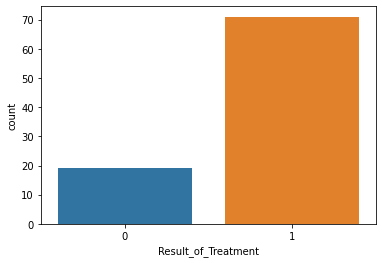

In [46]:
sns.countplot(df['Result_of_Treatment'])

In [47]:
from sklearn.utils import resample

df_majority = df[(df['Result_of_Treatment']==1)] 
df_minority = df[(df['Result_of_Treatment']==0)] 

In [48]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples= 71, random_state=42)
df = pd.concat([df_minority_upsampled, df_majority])

In [49]:
df['Result_of_Treatment'].value_counts()

0    71
1    71
Name: Result_of_Treatment, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

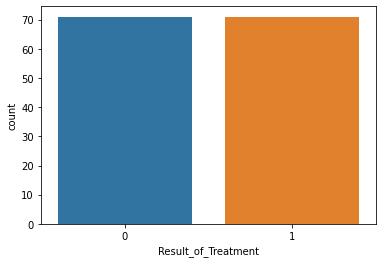

In [50]:
sns.countplot(df['Result_of_Treatment'])

# Create Model

In [51]:
#describe dataset
df.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.00000
mean,1.549296,33.063380,8.382324,5.746479,1.654930,103.035211,14.471901,0.50000
std,0.499325,11.517618,4.361923,3.997227,0.781395,125.083768,16.651143,0.50177
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.00000
25%,1.000000,24.250000,5.500000,2.000000,1.000000,41.250000,6.000000,0.00000
50%,2.000000,33.000000,8.500000,5.000000,1.000000,58.500000,7.000000,0.50000
75%,2.000000,45.000000,11.187500,8.000000,2.000000,91.000000,9.000000,1.00000
max,2.000000,56.000000,36.760000,19.000000,3.000000,900.000000,70.000000,1.00000


In [52]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 6 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               142 non-null    int64  
 1   age                  142 non-null    int64  
 2   Time                 142 non-null    float64
 3   Number_of_Warts      142 non-null    float64
 4   Type                 142 non-null    float64
 5   Area                 142 non-null    int64  
 6   induration_diameter  142 non-null    float64
 7   Result_of_Treatment  142 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 14.1 KB


In [53]:
#mengganti type column yang tidak sesuai
df[['Number_of_Warts', 'Type', 'induration_diameter']]  = df[['Number_of_Warts', 'Type', 'induration_diameter']].astype('int64')

In [54]:
#cek apakah type column sudah sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 6 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               142 non-null    int64  
 1   age                  142 non-null    int64  
 2   Time                 142 non-null    float64
 3   Number_of_Warts      142 non-null    int64  
 4   Type                 142 non-null    int64  
 5   Area                 142 non-null    int64  
 6   induration_diameter  142 non-null    int64  
 7   Result_of_Treatment  142 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 14.1 KB


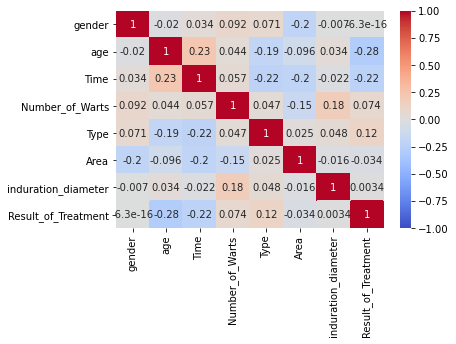

In [55]:
#cek heatmap dataset yang telah terisi untuk meliat korelasi antar variabel
sns.heatmap(df.corr(), cmap = "coolwarm", vmin = -1, vmax = 1, annot=True)
plt.show()

## Create Model Classification

In [56]:
X = df[['age','Time','Result_of_Treatment']]
y = df['Type']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

### KNN

In [58]:
from sklearn.preprocessing import StandardScaler    
sc = StandardScaler()    
X_train= sc.fit_transform(X_train)    
X_test= sc.transform(X_test)  

In [59]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=4, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [60]:
y_pred= classifier.predict(X_test)
y_pred

array([2, 1, 3, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
 [[6 0 1]
 [0 5 0]
 [2 0 1]]
Accuracy Score:  80.0


### SVM (Support Vector Machine)

In [62]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [63]:
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
 [[4 2 1]
 [1 4 0]
 [3 0 0]]
Accuracy Score:  53.333333333333336


### Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train, y_train)

In [66]:
y_pred = nbtrain.predict(X_test)
y_pred

array([2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 2, 1, 1], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
 [[5 0 2]
 [3 2 0]
 [3 0 0]]
Accuracy Score:  46.666666666666664


### Decision Tree Classification

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred = clf_en.predict(X_test)
y_pred

array([2, 1, 1, 2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 1, 3], dtype=int64)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
 [[3 1 3]
 [1 4 0]
 [2 1 0]]
Accuracy Score:  46.666666666666664


### Random Forest Classification

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 3, 2, 2, 1, 3, 2, 3, 1, 1, 1, 2, 2, 1], dtype=int64)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
 [[4 1 2]
 [0 5 0]
 [2 0 1]]
Accuracy Score:  66.66666666666666


## Create Model Regression

In [72]:
X = df[['age','Type','Area']]
y = df['Time']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = reg.predict(X_test)
y_pred

array([ 6.03617346,  6.70040546,  6.17402986,  7.48390367,  7.49236688,
        9.46676762,  9.08854016,  9.12051367,  9.70328029, 10.17031771,
        6.78043084,  9.66005092,  6.03617346,  7.14645466, 10.4160604 ,
        9.94902298,  6.0013097 ,  7.7876218 ,  8.04068871,  6.17402986,
        9.99371271,  8.15766061,  7.49236688,  6.58982013,  9.94902298,
        8.40085477,  0.3518047 ,  8.98973338,  8.40085477,  9.87644589,
        9.46676762, 10.78505784,  7.83934083,  9.75140941,  9.94902298,
        7.52332547])

In [76]:
def mape(y_test, pred):
    mape = np.mean(np.abs((y_test - pred) / y_test))*100
    return mape

print('MAPE :',mape(y_test, y_pred))
print('Model Score: ', reg.score(np.array(X_test), y_test)*100)

MAPE : 67.85088951205788
Model Score:  6.491495689301285


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Support Vector Regression

In [77]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X, y)

SVR()

In [78]:
y_pred = svr.predict(X_test)
y_pred

array([4.85248867, 8.49312316, 8.74985152, 8.04660922, 8.6001264 ,
       8.43072289, 8.0649074 , 9.0988349 , 8.18758964, 9.10593096,
       8.64760237, 8.76426847, 4.85248867, 8.01892581, 9.34041935,
       8.46540122, 8.58053364, 5.65004225, 7.42827922, 8.74985152,
       9.26705623, 8.08681855, 8.6001264 , 8.7995276 , 8.46540122,
       9.10143749, 6.2168143 , 8.10859524, 9.10143749, 8.48184811,
       8.43072289, 9.19481944, 7.82749823, 8.57047327, 8.46540122,
       9.24881173])

In [79]:
def mape(y_test, pred):
    mape = np.mean(np.abs((y_test - pred) / y_test))*100
    return mape

print('MAPE :',mape(y_test, y_pred))
print('Model Score: ', svr.score(np.array(X_test), y_test)*100)

MAPE : 63.620170467028046
Model Score:  22.129169324581955


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


### Decision Tree Regression

In [80]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [81]:
y_pred = regressor.predict(X_test)
y_pred

array([ 1.75, 12.  , 11.  ,  1.75,  8.5 , 10.5 ,  2.  , 10.  ,  5.  ,
       10.  ,  6.75,  8.  ,  1.75, 11.  ,  2.25, 11.5 ,  3.  ,  5.75,
        6.  , 11.  , 11.5 ,  7.75,  8.5 ,  5.  , 11.5 ,  8.75,  3.  ,
        6.5 ,  8.75,  6.25, 10.5 , 11.75, 11.75, 12.  , 11.5 , 18.24])

In [82]:
def mape(y_test, pred):
    mape = np.mean(np.abs((y_test - pred) / y_test))*100
    return mape

print('MAPE :',mape(y_test, y_pred))
print('Model Score: ', regressor.score(np.array(X_test), y_test)*100)

MAPE : 0.0
Model Score:  100.0


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### Random Forest Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor
regressorForest = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressorForest.fit(X, y)

RandomForestRegressor(random_state=0)

In [84]:
y_pred = regressorForest.predict(X_test)
y_pred

array([ 1.75  , 11.44  , 11.    ,  1.88  ,  8.5   , 10.365 ,  3.8275,
       10.1643,  7.2126, 10.005 ,  6.125 ,  8.2533,  1.75  ,  9.6375,
        3.0925, 11.435 ,  3.925 ,  6.1725,  7.0775, 11.    , 11.505 ,
        9.6888,  8.5   ,  5.4229, 11.435 ,  8.7633,  3.7725,  6.6875,
        8.7633,  8.3775, 10.365 , 11.7696, 10.4002, 11.8425, 11.435 ,
       13.5612])

In [85]:
def mape(y_test, pred):
    mape = np.mean(np.abs((y_test - pred) / y_test))*100
    return mape

print('MAPE :',mape(y_test, y_pred))
print('Model Score: ', regressorForest.score(np.array(X_test), y_test)*100)

MAPE : 11.310924462441212
Model Score:  91.23524376447136


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Create Model Clustering

### K-Means Clustering

In [86]:
scale = StandardScaler()
dfscale = scale.fit_transform(df)
dfscale

array([[-1.10397011,  1.04004779,  0.65976118, ..., -0.2489937 ,
        -0.57044648, -1.        ],
       [ 0.90582163,  0.08160847,  0.02707352, ...,  0.48109403,
        -0.44990571, -1.        ],
       [ 0.90582163, -0.61543831,  0.48721   , ..., -0.42549843,
        -0.32936493, -1.        ],
       ...,
       [ 0.90582163,  1.64996372, -1.41085296, ..., -0.32120018,
        -0.44990571,  1.        ],
       [ 0.90582163,  1.73709457,  0.37217588, ..., -0.58595727,
         0.63496126,  1.        ],
       [ 0.90582163,  1.73709457, -0.26051177, ..., -0.17678722,
        -0.44990571,  1.        ]])

In [87]:
from sklearn.cluster import KMeans
# set the parameter for evaluating K
kmeans_kwargs = {"init": "k-means++","n_init": 10,"max_iter": 300,"random_state": 42}
sse = []
# check the inertia for each K
for k in range(1, 11):
    kmeansmodel = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeansmodel.fit(dfscale)
    sse.append(kmeansmodel.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

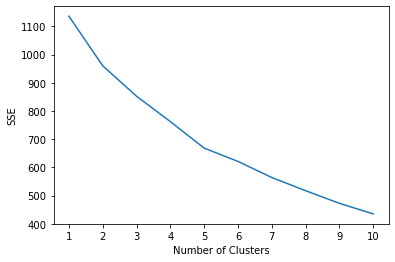

In [88]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [89]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

5

In [90]:
kmeans = KMeans(n_clusters=5,init="random").fit(dfscale)
sse.append(kmeansmodel.inertia_)
df_kmeans = kmeans.predict(dfscale)
df["Cluster"]=df_kmeans
df.head()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,Cluster
6,1,45,11.25,4,1,72,5,0,1
14,2,34,8.50,1,2,163,7,0,1
10,2,26,10.50,6,1,50,9,0,1
7,1,46,11.50,4,1,91,25,0,1
6,1,45,11.25,4,1,72,5,0,1


In [91]:
kmeans = KMeans(n_clusters=5, max_iter = 1000, random_state = 1)
kmeans.fit(X)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=5, random_state=1)

In [92]:
y_pred = kmeans.predict(X)
y_pred

array([4, 2, 0, 4, 4, 0, 0, 0, 1, 4, 0, 2, 4, 4, 2, 0, 4, 4, 4, 0, 0, 2,
       2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 0, 0, 2, 2, 4, 4, 4, 2, 0, 0,
       4, 1, 0, 4, 1, 2, 4, 0, 1, 0, 4, 2, 0, 1, 0, 0, 2, 4, 0, 4, 0, 0,
       0, 2, 0, 0, 2, 0, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0,
       4, 4, 1, 4, 0, 0, 4, 0, 4, 4, 1, 0, 4, 0, 0, 0, 0, 0, 4, 0, 2, 0,
       4, 0, 0, 0, 2, 0, 4, 1, 0, 0, 0, 2, 0, 0, 0, 0, 4, 2, 1, 0, 0, 0,
       0, 4, 1, 0, 0, 4, 4, 4, 0, 4])

In [94]:
from sklearn.metrics import silhouette_score

silhouette_score(X,y_pred)

0.509909768253352

###### Setelah mengisi data null pada dataset ini saya menemukan bahwa untuk mengisi null values pada time dan induration diameter lebih baik menggunakan regresi daripada model yang lainnya khususnya menggunakan randomforest regressor. Dengan menggunakan random forest regressor ini saya mendapatkan model score dan MAPE yang cukup baik. Untuk model lainnya hanya kkn yang memiliki model score yang cukup baik pula namun masih lebih baik random forest. Sedangkan model yang lainnya menurut saya kurang karena menghasilkan model score yang rendah dan MAPE yang tinggi. Untuk bagian Type, saya menggunakan Support Vector Machine Classification karena menurut saya pada bagian ini sangat sesuai sekali menggunakan clasifikasi khususnya menggunakan SVC tersebut. Sedangkan pada model lain hasilnya kurang memuaskan. Lalu untuk Number of Warts saya menggunakan mean karena saya sudah mencoba beberapa model machine learning namun hasil prediksinya tetap jauh dari data aktualnya.